In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import rotate
from sklearn.decomposition import PCA

# Step 1:

In [2]:
#faces = pd.read_csv("faces.dat", sep = " ", header = None)
faces = np.loadtxt("faces.dat")
#faces.shape

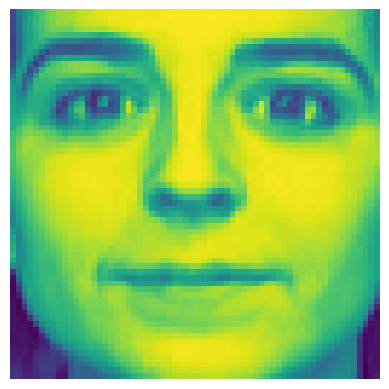

In [3]:
#image_100 = faces.iloc[99, :].values.reshape(64, 64)
image_100 = faces[99, :].reshape(64, 64)

#plt.imshow(image_100)
#plt.title('100th Image')
#plt.axis('off')
#plt.show()

plt.imshow(rotate(image_100, angle=270, reshape=False))
plt.axis('off')
plt.show()

# Step 2:

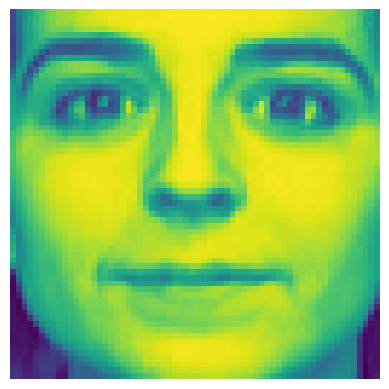

In [4]:
mean_images = np.mean(faces, axis=1)

new_faces = faces - mean_images[:, np.newaxis]
new_image_100 = faces[99, :].reshape(64, 64)

plt.imshow(rotate(new_image_100, angle=270, reshape=False))
plt.axis('off')
plt.show()

# Step 3:

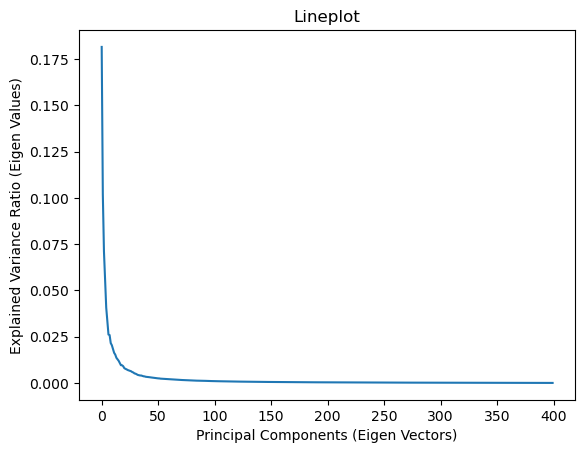

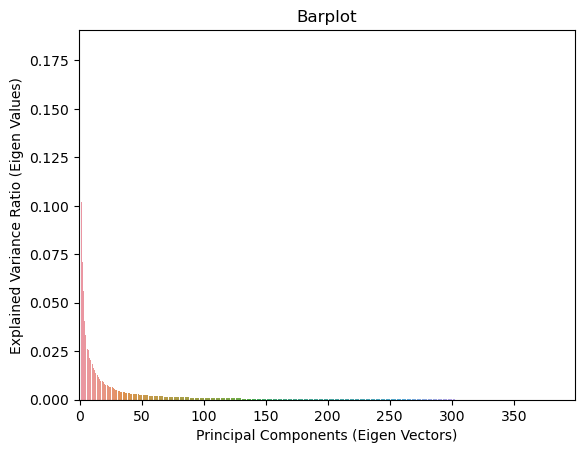

In [5]:
pca = PCA()
pca.fit(new_faces)
exp_var_ratios = pca.explained_variance_ratio_

#plt.figure(figsize=(10, 10))
sns.lineplot(x=np.arange(len(exp_var_ratios)), y=exp_var_ratios)
plt.title('Lineplot')
plt.xlabel('Principal Components (Eigen Vectors)')
plt.ylabel('Explained Variance Ratio (Eigen Values)')
plt.show()


#plt.figure(figsize=(10, 10))
ax = sns.barplot(x=np.arange(len(exp_var_ratios)), y=exp_var_ratios)
plt.title('Barplot')
plt.xlabel('Principal Components (Eigen Vectors)')
plt.ylabel('Explained Variance Ratio (Eigen Values)')

tick_values = np.arange(0, len(exp_var_ratios), 50)
ax.set_xticks(tick_values)
ax.set_xticklabels(tick_values)

plt.show()

# Step 4:

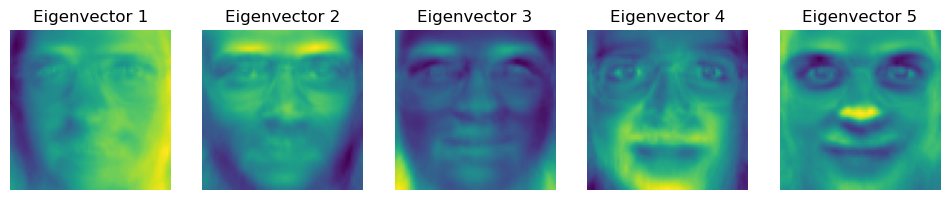

In [6]:
top_eigenvectors = pca.components_[:5]

plt.figure(figsize=(12, 6))
for i, eigenvector in enumerate(top_eigenvectors):
    plt.subplot(1, 5, i + 1)
    eigenvector_image = eigenvector.reshape(64, 64)
    plt.imshow(eigenvector_image.T)
    plt.title(f"Eigenvector {i + 1}")
    plt.axis('off')

plt.show()

# Step 5:

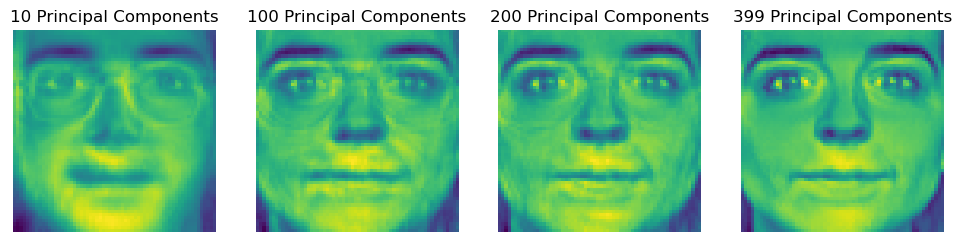

In [7]:
components_list = [10, 100, 200, 399]

plt.figure(figsize=(12, 6))
for i, num_components in enumerate(components_list):
    reconstructed_image = np.dot(pca.transform(new_faces)[99, :num_components], pca.components_[:num_components])
    reconstructed_image = reconstructed_image.reshape(64, 64)
    
    plt.subplot(1, 4, i + 1)
    plt.imshow(reconstructed_image.T)
    plt.title(f"{num_components} Principal Components")
    plt.axis('off')

plt.show()